<a href="https://colab.research.google.com/github/cynthiiaa/random-analyses/blob/main/Meteorite_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Meteorite_Landings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [2]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [3]:
df2 = df.dropna(subset=["mass", "year"])
df2 = df2[df2.mass > 0]

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45292 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45292 non-null  object 
 1   id           45292 non-null  int64  
 2   nametype     45292 non-null  object 
 3   recclass     45292 non-null  object 
 4   mass         45292 non-null  float64
 5   fall         45292 non-null  object 
 6   year         45292 non-null  float64
 7   reclat       38097 non-null  float64
 8   reclong      38097 non-null  float64
 9   GeoLocation  38097 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


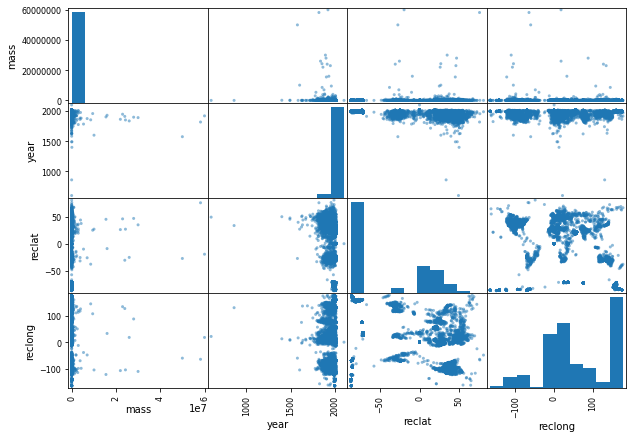

In [5]:
pd.plotting.scatter_matrix(df2[["mass", "year", "reclat", "reclong"]], figsize=(10,7));

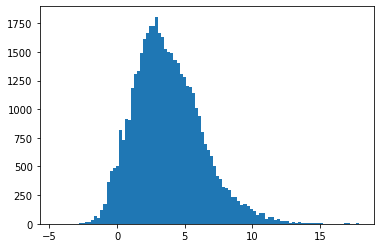

In [6]:
year = df2["year"]
masses = df2["mass"]
logmass = np.log(masses) # a list of exponent values where e is the base
plt.hist(logmass, bins=100);

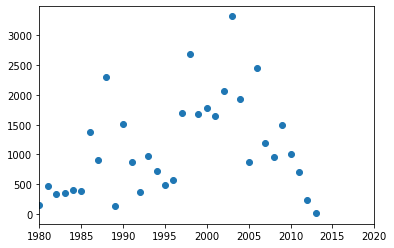

In [7]:
counts = year.value_counts()
plt.scatter(counts.index, counts) #the index are the years
plt.xlim(1980,2020);

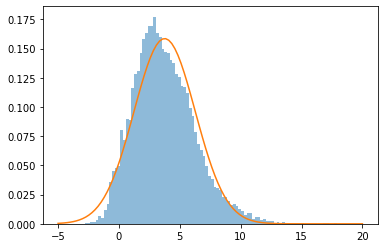

In [8]:
from scipy.stats import norm, skewnorm, lognorm
ms = np.linspace(-5, 20, 100) # these values are from the horizontal axis of the first histogram

mean, std = logmass.mean(), np.std(logmass)
pdf_norm = norm.pdf(ms, mean, std)
plt.hist(logmass, bins=100, density=True, alpha=0.5)
plt.plot(ms, pdf_norm);

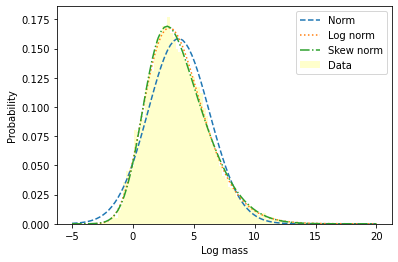

In [9]:
p_lognorm = lognorm.fit(logmass)
pdf_lognorm = lognorm.pdf(ms, *p_lognorm)

p_skewnorm = skewnorm.fit(logmass)
pdf_skewnorm = skewnorm.pdf(ms, *p_skewnorm)

plt.hist(logmass, bins=100, density=True, alpha=0.2, label="Data", color="yellow")
plt.plot(ms, pdf_norm, label="Norm", ls="--")
plt.plot(ms, pdf_lognorm, label="Log norm", ls=":") # since the lognormal distribution fits the data well and the data is already logmass we'll use the lognormal distribution
plt.plot(ms, pdf_skewnorm, label="Skew norm", ls="-.")

plt.legend()
plt.xlabel("Log mass")
plt.ylabel("Probability");

In [10]:
mass_of_doom = np.log((4/3) * np.pi * 500**3 * 1600 * 1000) # using volume of a sphere to approximate mass of meteorite
mass_of_doom

34.36175044077777

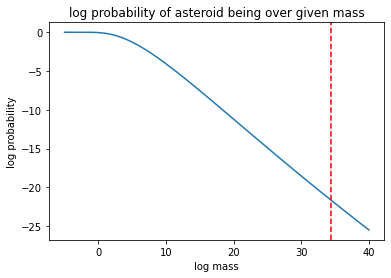

In [12]:
# given a random meteorite, what's the chance it's mass is close to mass_of_doom?

ms2 = np.linspace(-5, 40, 200) # new simulated data that goes up to mass_of_doom
plt.plot(ms2, lognorm.logsf(ms2, *p_lognorm))
plt.axvline(mass_of_doom, ls="--", color="red")
plt.xlabel("log mass")
plt.ylabel("log probability")
plt.title("log probability of asteroid being over given mass");

# the mass_of_doom line crosses the probabilty function at a very small number (around e^-20)
# so the chances of a random meteorite having the mass equal to or larger than mass_of_doom is **slim**

In [17]:
prob_small_mass = lognorm.logcdf(mass_of_doom, *p_lognorm) # probability of a random meteorite having a mass smaller than mass_of_doom
frac_sky_monitored = 0.2
num_years = 1000
num_events = num_years * counts.max() / frac_sky_monitored
prob_bad = 1 - np.exp(num_events * prob_small_mass)
print(f"Prob of >1km asteroid impacts Earth within the next {num_years} years is {prob_bad * 100:.2f}%")

Prob of >1km asteroid impacts Earth within the next 1000 years is 0.67%
